In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import seaborn as sns
import matplotlib.pyplot as plt
from math import isnan

In [41]:
data = pd.read_csv('imdb_revised_data.csv')
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,300 to 399
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,100 to 199
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,NaN,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,100 to 199
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,200 to 299
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,Jared Leto,Margot Robbie,Viola Davis,300 to 399


In [42]:
#data clean up
#deleting extra index column
#del data['Unnamed: 0']

In [43]:
#renaming columns with spaces
data=data.rename(columns = {'Revenue (Millions)':'Revenue_Millions'})

data=data.rename(columns = {'Runtime (Minutes)':'Runtime_Minutes'})
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,300 to 399
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,100 to 199
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,NaN,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,100 to 199
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,200 to 299
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,Jared Leto,Margot Robbie,Viola Davis,300 to 399


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
Rank                1000 non-null int64
Title               1000 non-null object
Genre               1000 non-null object
Description         1000 non-null object
Director            1000 non-null object
Actors              1000 non-null object
Year                1000 non-null int64
Runtime_Minutes     1000 non-null int64
Rating              1000 non-null float64
Votes               1000 non-null int64
Revenue_Millions    872 non-null float64
Metascore           936 non-null float64
Genre1              1000 non-null object
Genre2              895 non-null object
Genre3              660 non-null object
Actor1              1000 non-null object
Actor2              1000 non-null object
Actor3              1000 non-null object
Actor4              999 non-null object
Rev_Summary         869 non-null object
dtypes: float64(3), int64(4), object(13)
memory usage: 156.3+ KB


In [45]:
# fill none value with NAN to avoid errors 
#data.fillna("NaN", inplace = True) 
#data.info()

In [46]:
#Finding the top ten directors
director_counts = data["Director"].value_counts()
director_counts
top_ten = director_counts[0:10]
top_ten

Ridley Scott          8
David Yates           6
Michael Bay           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
J.J. Abrams           5
David Fincher         5
Justin Lin            5
Antoine Fuqua         5
Zack Snyder           5
Name: Director, dtype: int64

In [47]:
#counting number of occcurances a genre name comes up between genre
Genre_play = {}

for Genre_name in data['Genre1'].dropna():
    if Genre_name not in Genre_play.keys():
        Genre_play[Genre_name] = 1
    else:
        Genre_play[Genre_name] = Genre_play[Genre_name] + 1
        
for Genre_name in data['Genre2'].dropna():
    if Genre_name not in Genre_play.keys():
        Genre_play[Genre_name] = 1
    else:
        Genre_play[Genre_name] = Genre_play[Genre_name] + 1
Genre_play

{'Action': 303,
 'Adventure': 250,
 'Horror': 95,
 'Animation': 49,
 'Comedy': 237,
 'Biography': 79,
 'Drama': 433,
 'Crime': 129,
 'Romance': 71,
 'Mystery': 62,
 'Thriller': 62,
 'Sci-Fi': 31,
 'Fantasy': 39,
 'Family': 27,
 'History': 8,
 'Music': 8,
 'Western': 2,
 'War': 4,
 'Musical': 1,
 'Sport': 5}

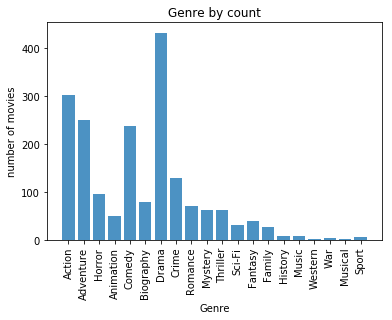

In [48]:
dictionary = plt.figure()

plt.bar(range(len(Genre_play)), Genre_play.values(), alpha=0.8, align='center')
plt.xticks(range(len(Genre_play)), Genre_play.keys(), rotation="vertical")
plt.xlabel("Genre")
plt.ylabel("number of movies")
plt.title("Genre by count")
plt.savefig('output/numberGenre.png')

In [49]:
Genre_play
#clean_genre = del Genre_play['nan']
#clean_genre



{'Action': 303,
 'Adventure': 250,
 'Horror': 95,
 'Animation': 49,
 'Comedy': 237,
 'Biography': 79,
 'Drama': 433,
 'Crime': 129,
 'Romance': 71,
 'Mystery': 62,
 'Thriller': 62,
 'Sci-Fi': 31,
 'Fantasy': 39,
 'Family': 27,
 'History': 8,
 'Music': 8,
 'Western': 2,
 'War': 4,
 'Musical': 1,
 'Sport': 5}

In [50]:
actor_play = {}

for actor_name in data['Actor1']:
    if actor_name not in actor_play.keys():
        actor_play[actor_name] = 1
    else:
        actor_play[actor_name] = actor_play[actor_name] + 1
        
for actor_name in data['Actor2']:
    if actor_name not in actor_play.keys():
        actor_play[actor_name] = 1
    else:
        actor_play[actor_name] = actor_play[actor_name] + 1

for actor_name in data['Actor3']:
    if actor_name not in actor_play.keys():
        actor_play[actor_name] = 1
    else:
        actor_play[actor_name] = actor_play[actor_name] + 1

In [51]:
sorted_by_play = sorted(actor_play.items(), key=itemgetter(1), reverse=True)

In [52]:
top_ten = sorted_by_play[0:10]

In [53]:
top_ten

[('Christian Bale', 11),
 ('Mark Wahlberg', 11),
 ('Will Smith', 9),
 ('Denzel Washington', 9),
 ('Brad Pitt', 9),
 ('Leonardo DiCaprio', 9),
 ('Jake Gyllenhaal', 9),
 ('Adam Sandler', 9),
 ('Johnny Depp', 8),
 ('Tom Hanks', 8)]

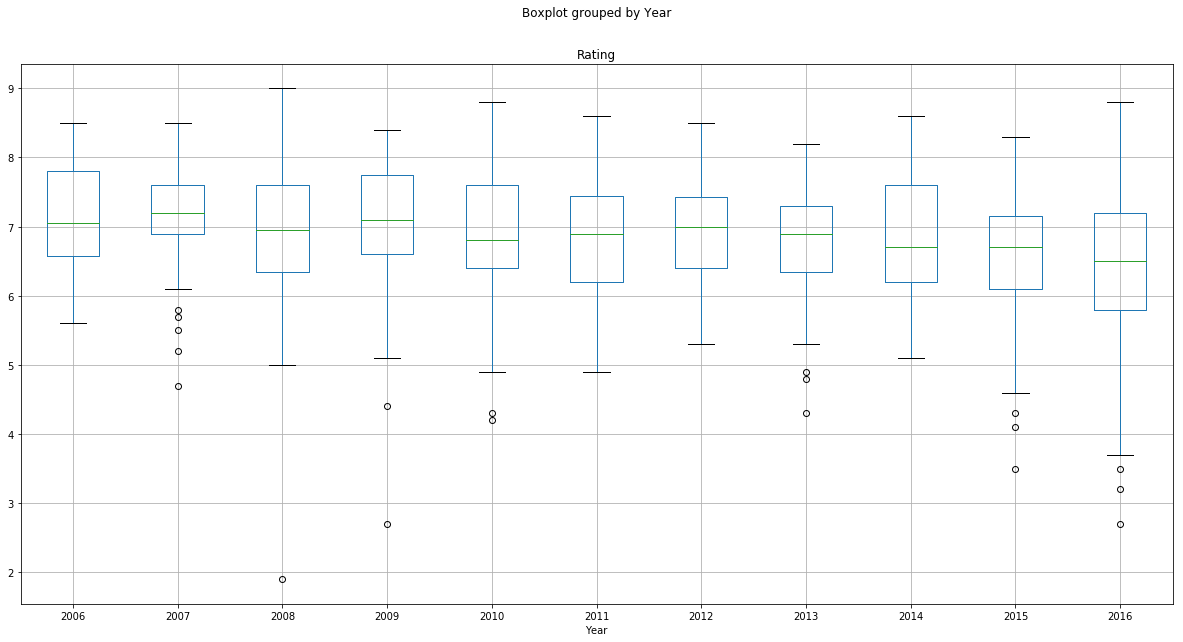

In [54]:
data.boxplot("Rating", by="Year", figsize=(20, 10))

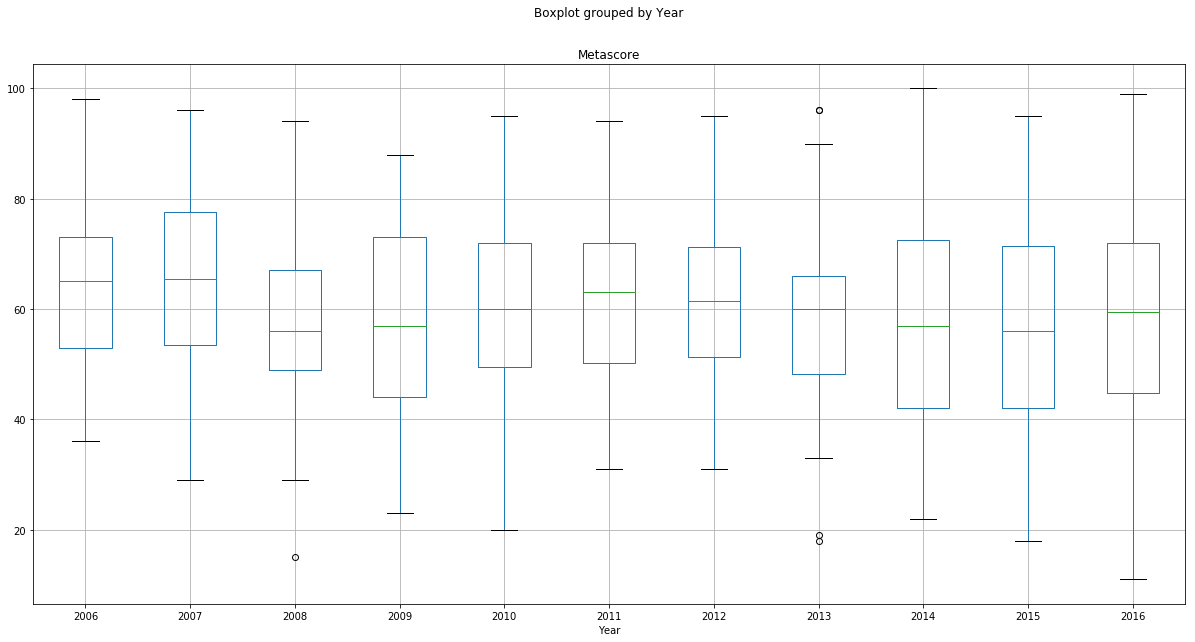

In [55]:
data.boxplot("Metascore", by="Year", figsize=(20, 10))

In [56]:
# Compute the descriptive statistics of a and b.
abar = data['Rating'].mean()
avar = data['Rating'].var(ddof=1)
na = data['Rating'].size
adof = na - 1

bbar = data['Revenue_Millions'].mean()
bvar = data['Revenue_Millions'].var(ddof=1)
nb = data['Revenue_Millions'].size
bdof = nb - 1

# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

# Use the formulas directly.
tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("formula:              t = %g  p = %g" % (tf, pf))   
print("The differences between metascore and rating are significant")

ttest_ind_from_stats: t = -23.3465  p = 1.47919e-96
formula:              t = -23.3465  p = 1.47919e-96
The differences between metascore and rating are significant


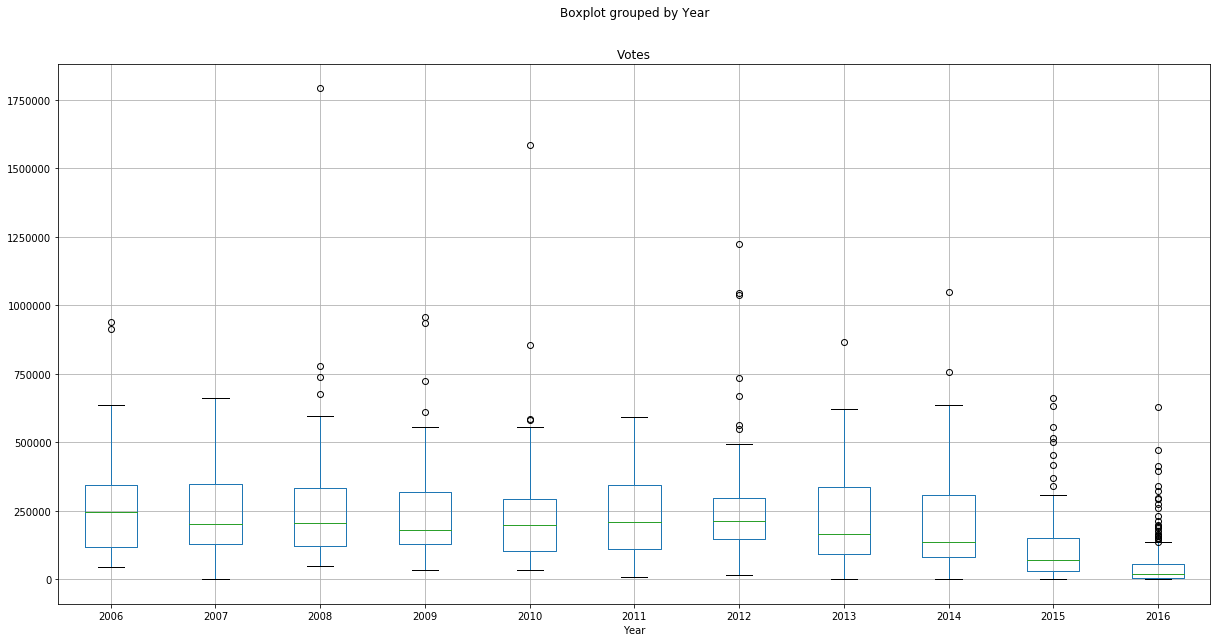

In [57]:
data.boxplot("Votes", by="Year", figsize=(20, 10))

In [58]:
meta=data['Metascore']/10

In [59]:
abar = data['Rating'].mean()
avar = data['Rating'].var(ddof=1)
na = data['Rating'].size
adof = na - 1

bbar = meta.mean()
bvar = meta.var(ddof=1)
nb = meta.size
bdof = nb - 1

# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

# Use the formulas directly.
tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("formula:              t = %g  p = %g" % (tf, pf))   
print("The differences between Rating and metascore are significant")

ttest_ind_from_stats: t = 13.2904  p = 2.9708e-38
formula:              t = 13.2904  p = 2.9708e-38
The differences between Rating and metascore are significant


C:\Users\mvesk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


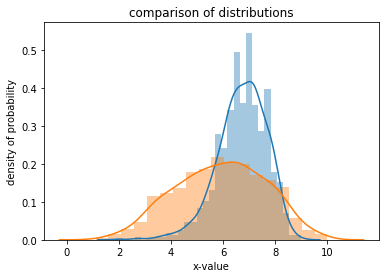

In [60]:
sns.distplot(data['Rating'])
df = data[np.isfinite(data['Metascore'])]
sns.distplot(df['Metascore']/10)
plt.xlabel("x-value")
plt.ylabel("density of probability")
plt.title("comparison of distributions")
plt.savefig('output/dis.png')

In [61]:
bbar = meta.mean()
abar = data['Rating'].mean()
print(bbar)
print(abar)

5.898504273504273
6.723200000000003


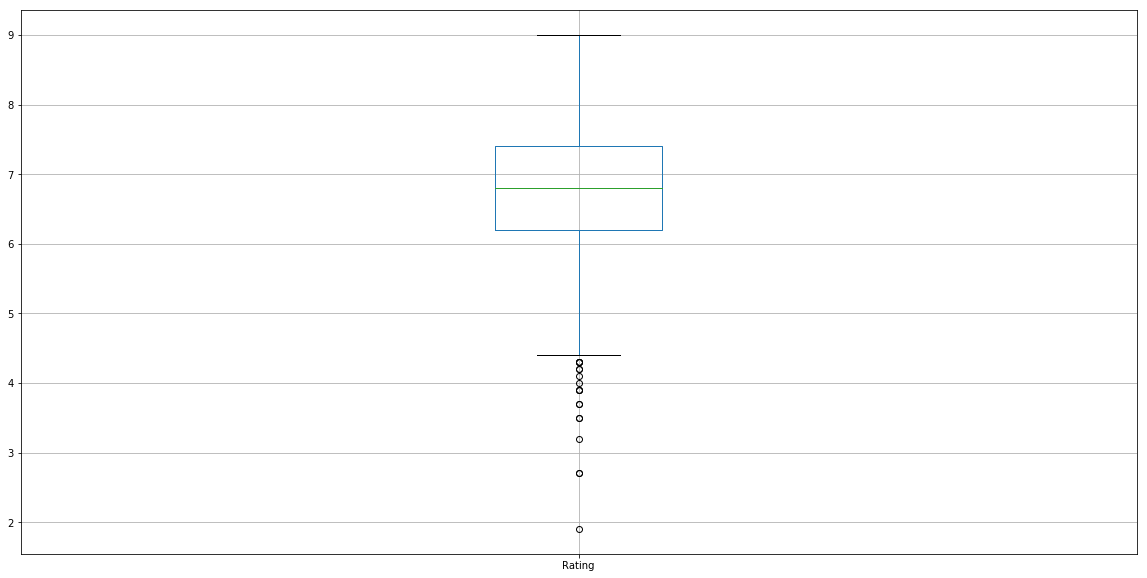

In [62]:
data.boxplot("Rating", figsize=(20, 10))
plt.savefig('output/boxrating.png')

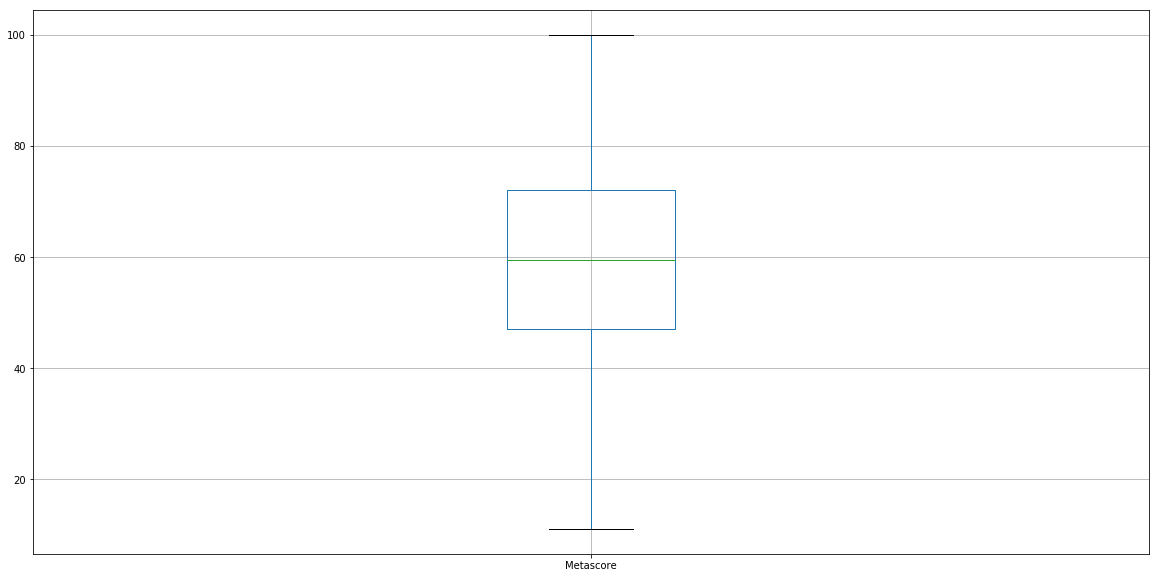

In [63]:
data.boxplot(['Metascore'], figsize=(20, 10))
plt.savefig('output/boxmeta.png')

Number of movies with Action = 303
Number of movies with Adventure = 259
Number of movies with Animation = 49
Number of movies with Biography = 81
Number of movies with Comedy = 279
Number of movies with Crime = 150
Number of movies with Drama = 513
Number of movies with Fantasy = 101
Number of movies with Family = 51
Number of movies with Horror = 119
Number of movies with Musical = 5
Number of movies with Romance = 141


C:\Users\mvesk\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


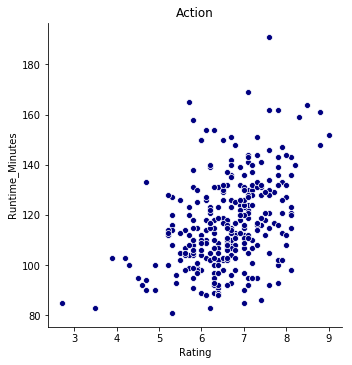

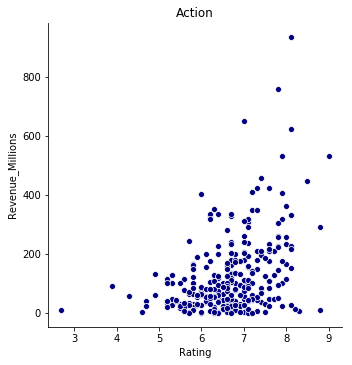

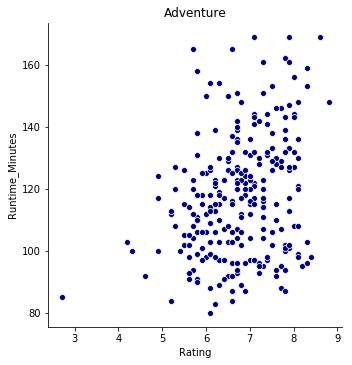

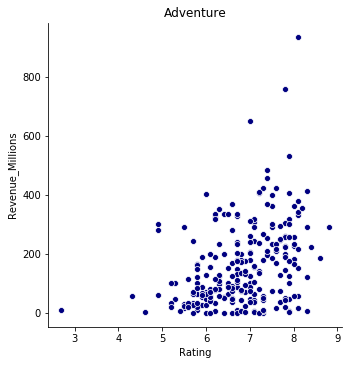

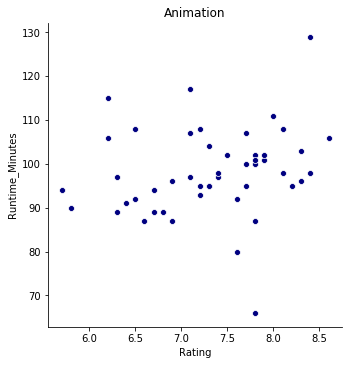

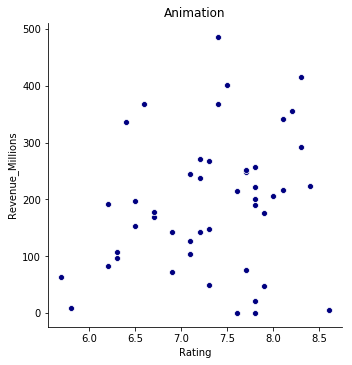

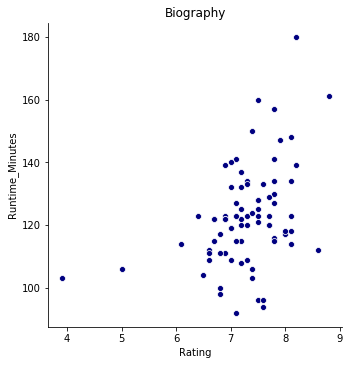

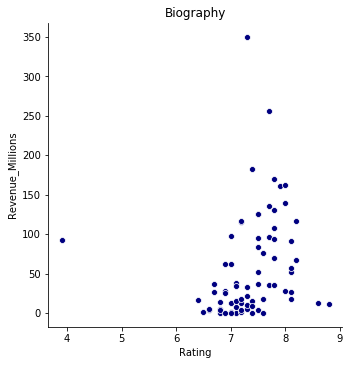

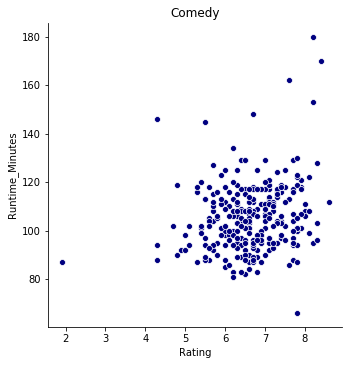

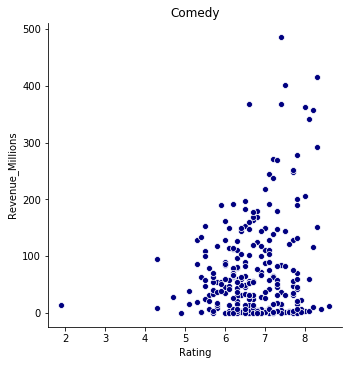

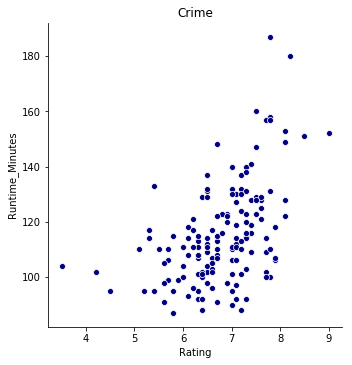

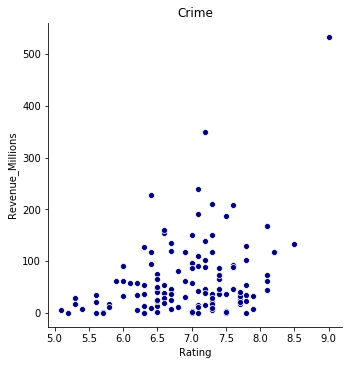

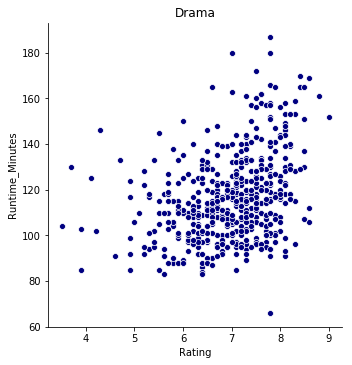

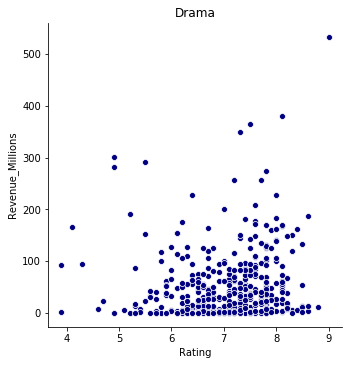

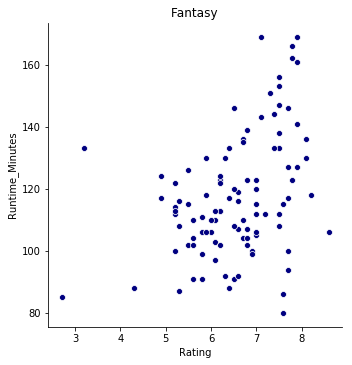

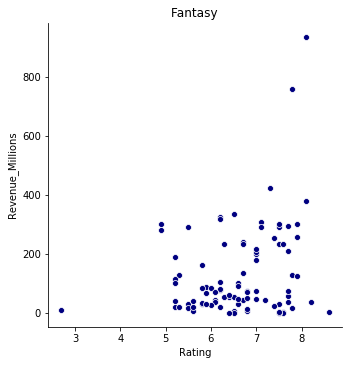

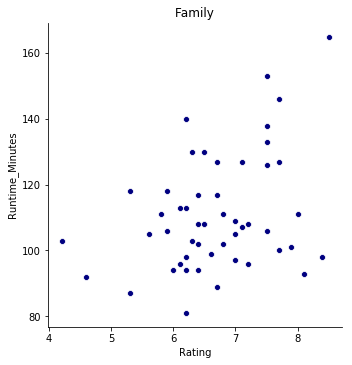

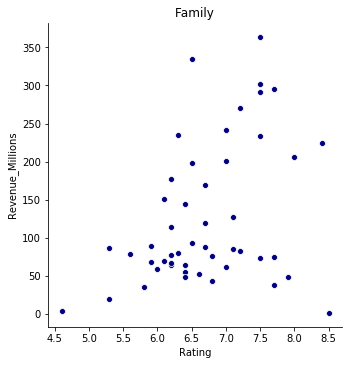

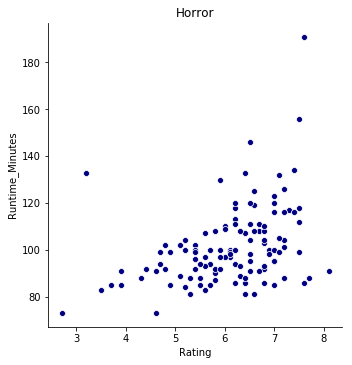

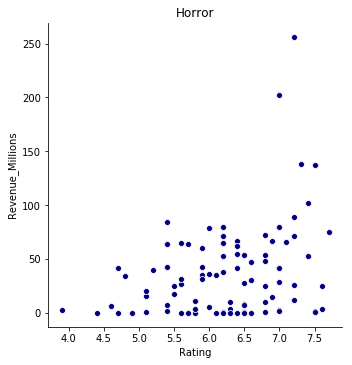

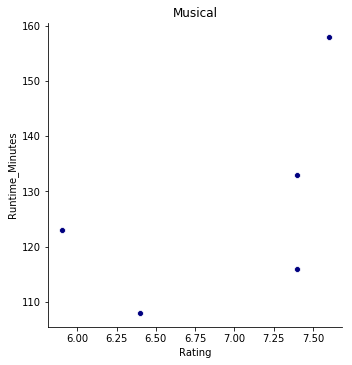

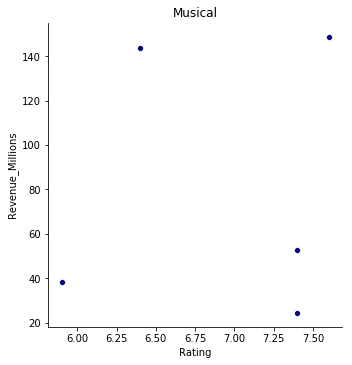

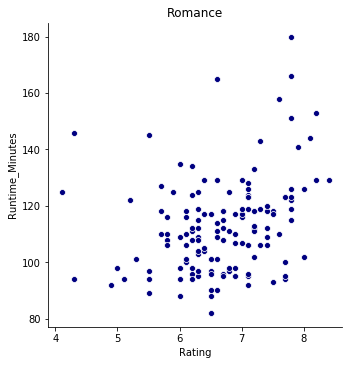

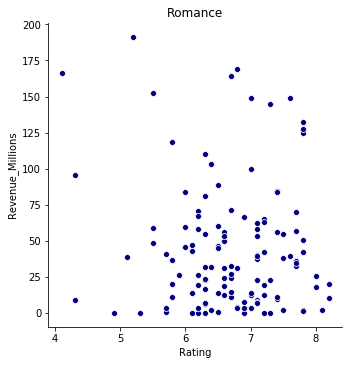

In [64]:
seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family', 'Horror', 'Musical' ,'Romance'
for genre in seperate_genre:
    df = data['Genre'].str.contains(genre).fillna(False)
    print('Number of movies with',genre,'=',len(data[df]))
    compare_movies_rating = ['Runtime_Minutes', 'Revenue_Millions']
    for compare in compare_movies_rating:
        sns.relplot(x='Rating', y=compare, data=data[df], color='navy')
        plt.title(genre)

In [65]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore',
       'Genre1', 'Genre2', 'Genre3', 'Actor1', 'Actor2', 'Actor3', 'Actor4',
       'Rev_Summary'],
      dtype='object')

In [66]:
data.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [67]:
data[(data['Runtime_Minutes']==max(data.Runtime_Minutes))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.03,NaN,Action,Horror,Thriller,Kurt Russell,Rose McGowan,Danny Trejo,Zoë Bell,0 to 99


In [95]:
data[(data['Runtime_Minutes']==min(data.Runtime_Minutes))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
793,794,Ma vie de Courgette,"Animation,Comedy,Drama","After losing his mother, a young boy is sent t...",Claude Barras,"Gaspard Schlatter, Sixtine Murat, Paulin Jacco...",2016,66,7.8,4370,0.29,85.0,Animation,Comedy,Drama,Gaspard Schlatter,Sixtine Murat,Paulin Jaccoud,Michel Vuillermoz,0 to 99


In [68]:
data[(data['Revenue_Millions']==max(data.Revenue_Millions))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Action,Adventure,Fantasy,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,NaN


In [96]:
data[(data['Revenue_Millions']==min(data.Revenue_Millions))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.0,50.0,Crime,Drama,Thriller,Patrick Wilson,Jessica Biel,Haley Bennett,Vincent Kartheiser,NaN


In [69]:
data[(data['Votes']==max(data.Votes))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,500 to 599


In [97]:
data[(data['Votes']==min(data.Votes))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
478,479,Paint It Black,Drama,A young woman attempts to deal with the death ...,Amber Tamblyn,"Alia Shawkat, Nancy Kwan, Annabelle Attanasio,...",2016,96,8.3,61,NaN,71.0,Drama,NaN,NaN,Alia Shawkat,Nancy Kwan,Annabelle Attanasio,Alfred Molina,NaN


In [70]:
data[(data['Metascore']==max(data.Metascore))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
656,657,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,100.0,Drama,NaN,NaN,Ellar Coltrane,Patricia Arquette,Ethan Hawke,Elijah Smith,0 to 99


In [98]:
data[(data['Metascore']==min(data.Metascore))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0,Comedy,Family,Fantasy,Kevin Spacey,Jennifer Garner,Robbie Amell,Cheryl Hines,0 to 99


In [71]:
data[(data['Rank']==max(data.Rank))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0,Comedy,Family,Fantasy,Kevin Spacey,Jennifer Garner,Robbie Amell,Cheryl Hines,0 to 99


In [99]:
data[(data['Rank']==min(data.Rank))]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,300 to 399


In [101]:
good_movies = data.loc[data["Rating"] > 6.7, :]
good_movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,300 to 399
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,100 to 199
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,NaN,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,100 to 199
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,200 to 299
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Comedy,Drama,Music,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons,100 to 199


In [105]:
unknown_movies = good_movies.loc[good_movies["Votes"] < 20000, ["Title", "Rating", "Votes", "Genre1","Revenue (Millions)"]]
unknown_movies.head()

C:\Users\mvesk\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Title,Rating,Votes,Genre1,Revenue (Millions)
8,The Lost City of Z,7.1,7188,Action,NaN
25,Paris pieds nus,6.8,222,Comedy,NaN
39,5- 25- 77,7.1,241,Comedy,NaN
46,Miss Sloane,7.3,17818,Drama,NaN
58,Their Finest,7.0,3739,Comedy,NaN


In [116]:
#Make an excel output list of under underappreciated movies
unknown_movies.to_excel("output/underappreciated_movies.xlsx", index=False)

In [72]:
# Create a group based on the values in the 'year' column
year_group = data.groupby('Year')

# Count how many times each year appears in our group
count_year = year_group['Year'].count()

count_year

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Year, dtype: int64

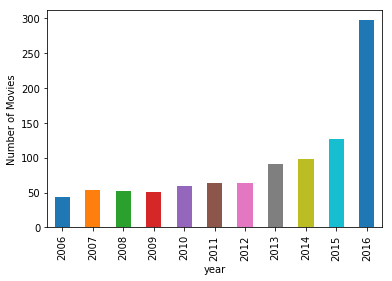

<Figure size 432x288 with 0 Axes>

In [77]:
# Create a bar chart based off of the group series from before
count_chart = count_year.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("year")
count_chart.set_ylabel("Number of Movies")


plt.show()
plt.tight_layout()
plt.savefig('output/yearbycount.png')

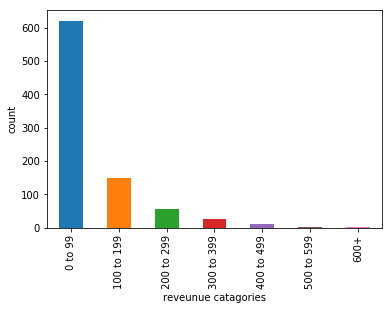

<Figure size 432x288 with 0 Axes>

In [94]:
# Create a group based on the values in the 'rev summary' column
money_group = data.groupby("Rev_Summary")

# Count how many times each catagory rev_summay appears in our group
count_money = money_group["Rev_Summary"].count()

#count_money
# Create a bar chart based off of the group series from before
count_chart = count_money.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("reveunue catagories")
count_chart.set_ylabel("count")


plt.show()
plt.tight_layout()
plt.savefig('output/Rev_summary_Histagram.png')

ValueError: RGBA values should be within 0-1 range

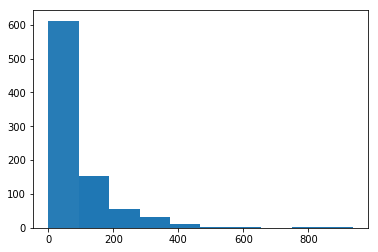

In [92]:
plt.figure()
df=data['Revenue_Millions']
df.plot.hist(alpha=10)
plt.savefig('output/HistagramRevenue.png')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
Rank                1000 non-null int64
Title               1000 non-null object
Genre               1000 non-null object
Description         1000 non-null object
Director            1000 non-null object
Actors              1000 non-null object
Year                1000 non-null int64
Runtime_Minutes     1000 non-null int64
Rating              1000 non-null float64
Votes               1000 non-null int64
Revenue_Millions    872 non-null float64
Metascore           936 non-null float64
Genre1              1000 non-null object
Genre2              895 non-null object
Genre3              660 non-null object
Actor1              1000 non-null object
Actor2              1000 non-null object
Actor3              1000 non-null object
Actor4              999 non-null object
Rev_Summary         869 non-null object
dtypes: float64(3), int64(4), object(13)
memory usage: 156.3+ KB


Text(0.5,1,'TOP 10 Revenue groups OF MOVIES')

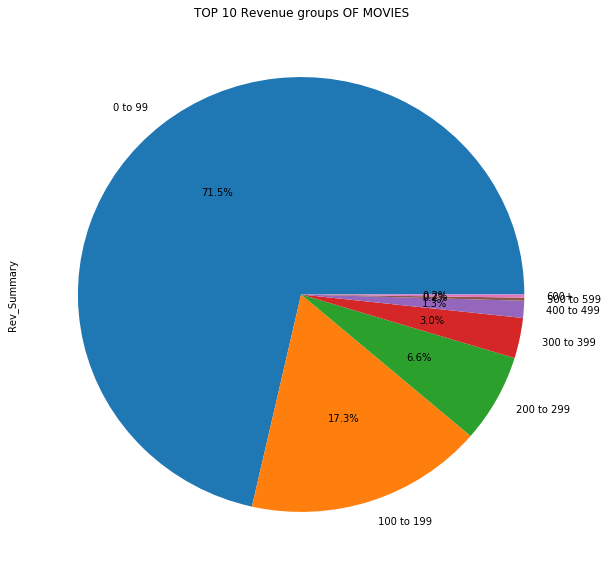

In [83]:
#data.info()
data.Rev_Summary.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP 10 Revenue groups OF MOVIES')

Text(0.5,1,'TOP 10 Genre1 OF MOVIES')

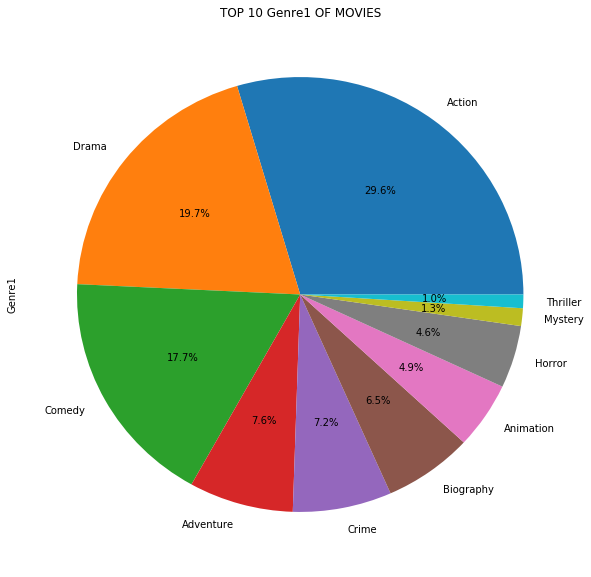

In [82]:
#Genre analysis:
data.Genre1.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP 10 Genre1 OF MOVIES')


Text(0.5,1,'TOP 10 Genre2 OF MOVIES')

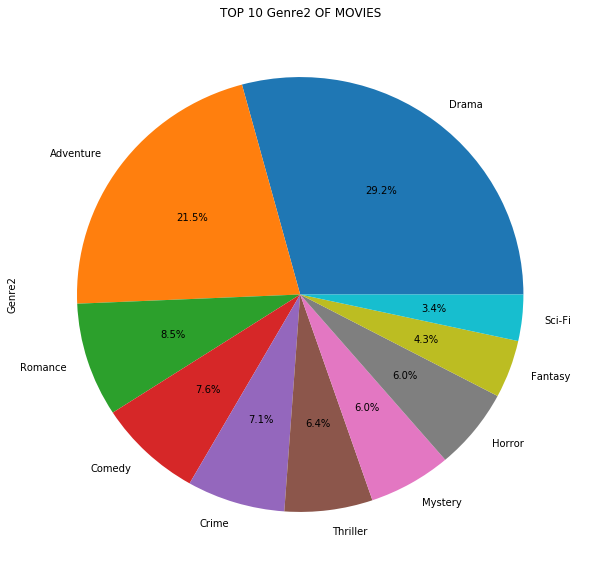

In [84]:
#Genre analysis:
data.Genre2.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP 10 Genre2 OF MOVIES')

Text(0.5,1,'TOP 10 Genre3 OF MOVIES')

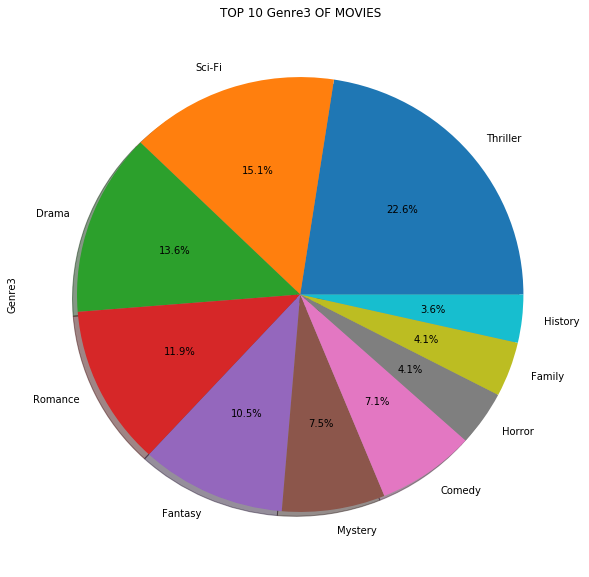

In [86]:
#Genre analysis:
data.Genre3.value_counts()[:10].plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.title('TOP 10 Genre3 OF MOVIES')

In [114]:
#data.Runtime_Minutes.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
#plt.title('TOP 10 runtime OF MOVIES')

In [88]:
#top 10 rating movies 
Sortedrating= data.sort_values(['Rating'], ascending=False)
Sortedrating.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,500 to 599
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,Action,Adventure,Sci-Fi,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Ken Watanabe,200 to 299
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN,Action,Biography,Drama,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,Sanya Malhotra,0 to 99
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,Adventure,Drama,Sci-Fi,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,100 to 199
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0,Animation,Drama,Fantasy,Ryûnosuke Kamiki,Mone Kamishiraishi,Ryô Narita,Aoi Yuki,0 to 99
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0,Biography,Comedy,Drama,François Cluzet,Omar Sy,Anne Le Ny,Audrey Fleurot,0 to 99
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0,Drama,Music,NaN,Miles Teller,J.K. Simmons,Melissa Benoist,Paul Reiser,0 to 99
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0,Drama,Mystery,Sci-Fi,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,0 to 99
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0,Crime,Drama,Thriller,Leonardo DiCaprio,Matt Damon,Jack Nicholson,Mark Wahlberg,100 to 199
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0,Drama,Family,Music,Darsheel Safary,Aamir Khan,Tanay Chheda,Sachet Engineer,0 to 99


In [117]:
data.describe()
# low rated movies
lowratedmovies= data.query('(Rating > 0) & (Rating < 6.0)')
lowratedmovies.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,Rev_Summary
24,25,Independence Day: Resurgence,"Action,Adventure,Sci-Fi",Two decades after the first Independence Day i...,Roland Emmerich,"Liam Hemsworth, Jeff Goldblum, Bill Pullman,Ma...",2016,120,5.3,127553,103.14,32.0,Action,Adventure,Sci-Fi,Liam Hemsworth,Jeff Goldblum,Bill Pullman,Maika Monroe,100 to 199
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN,Horror,Thriller,NaN,Jocelin Donahue,Jesse Bradford,Jesse Borrego,Lori Petty,0 to 99
29,30,Assassin's Creed,"Action,Adventure,Drama",When Callum Lynch explores the memories of his...,Justin Kurzel,"Michael Fassbender, Marion Cotillard, Jeremy I...",2016,115,5.9,112813,54.65,36.0,Action,Adventure,Drama,Michael Fassbender,Marion Cotillard,Jeremy Irons,Brendan Gleeson,0 to 99
34,35,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0,Action,Horror,Sci-Fi,Milla Jovovich,Iain Glen,Ali Larter,Shawn Roberts,0 to 99
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN,Horror,NaN,NaN,Brittany Blanton,Ayse Howard,Roman Jossart,Nadia White,NaN
47,48,Fallen,"Adventure,Drama,Fantasy",A young girl finds herself in a reform school ...,Scott Hicks,"Hermione Corfield, Addison Timlin, Joely Richa...",2016,91,5.6,5103,NaN,NaN,Adventure,Drama,Fantasy,Hermione Corfield,Addison Timlin,Joely Richardson,Jeremy Irvine,NaN
49,50,The Last Face,Drama,A director (Charlize Theron) of an internation...,Sean Penn,"Charlize Theron, Javier Bardem, Adèle Exarchop...",2016,130,3.7,987,NaN,16.0,Drama,NaN,NaN,Charlize Theron,Javier Bardem,Adèle Exarchopoulos,Jared Harris,NaN
51,52,Underworld: Blood Wars,"Action,Adventure,Fantasy","Vampire death dealer, Selene (Kate Beckinsale)...",Anna Foerster,"Kate Beckinsale, Theo James, Tobias Menzies, L...",2016,91,5.8,41362,30.35,23.0,Action,Adventure,Fantasy,Kate Beckinsale,Theo James,Tobias Menzies,Lara Pulver,0 to 99
52,53,Mother's Day,"Comedy,Drama",Three generations come together in the week le...,Garry Marshall,"Jennifer Aniston, Kate Hudson, Julia Roberts, ...",2016,118,5.6,20221,32.46,18.0,Comedy,Drama,NaN,Jennifer Aniston,Kate Hudson,Julia Roberts,Jason Sudeikis,0 to 99
63,64,Fifty Shades of Grey,"Drama,Romance,Thriller",Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015,125,4.1,244474,166.15,46.0,Drama,Romance,Thriller,Dakota Johnson,Jamie Dornan,Jennifer Ehle,Eloise Mumford,100 to 199


In [108]:
money_and_genre2 = data[['Revenue_Millions','Genre1']].groupby('Genre1').mean()
money_and_genre3 = data[['Revenue_Millions','Genre2']].groupby('Genre2').mean()
money_and_genre4 = data[['Revenue_Millions','Genre3']].groupby('Genre3').mean()

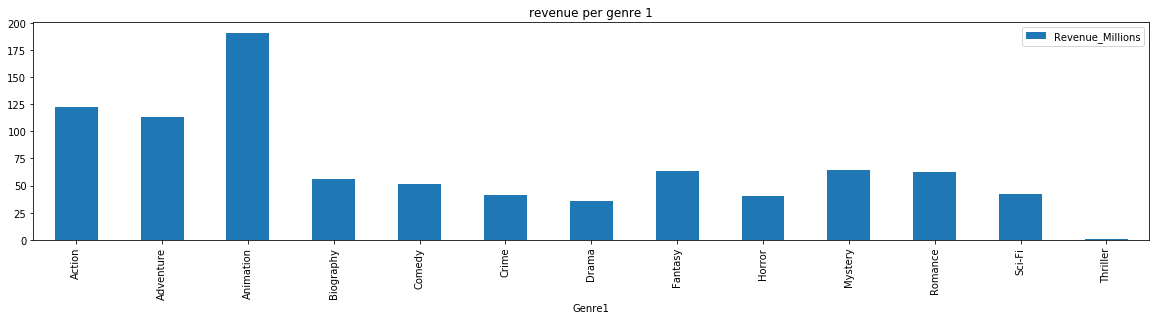

<Figure size 432x288 with 0 Axes>

In [109]:
# Use DataFrame.plot() in order to create a bar chart of the data
money_and_genre2.plot(kind="bar", figsize=(20,4))

# Set a title for the chart
plt.title("revenue per genre 1")

plt.show()
plt.tight_layout()
plt.savefig('output/RevenueVSGenre1.png')

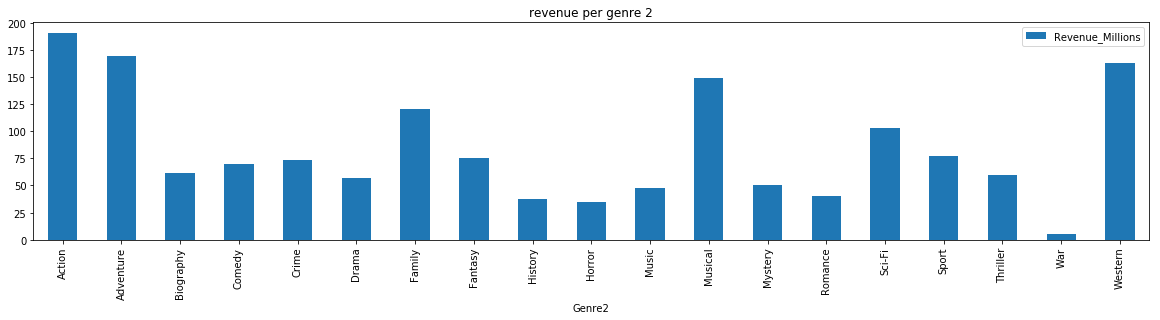

<Figure size 432x288 with 0 Axes>

In [110]:
# Use DataFrame.plot() in order to create a bar chart of the data
money_and_genre3.plot(kind="bar", figsize=(20,4))

# Set a title for the chart
plt.title("revenue per genre 2")

plt.show()
plt.tight_layout()
plt.savefig('output/RevenueVSGenre2.png')

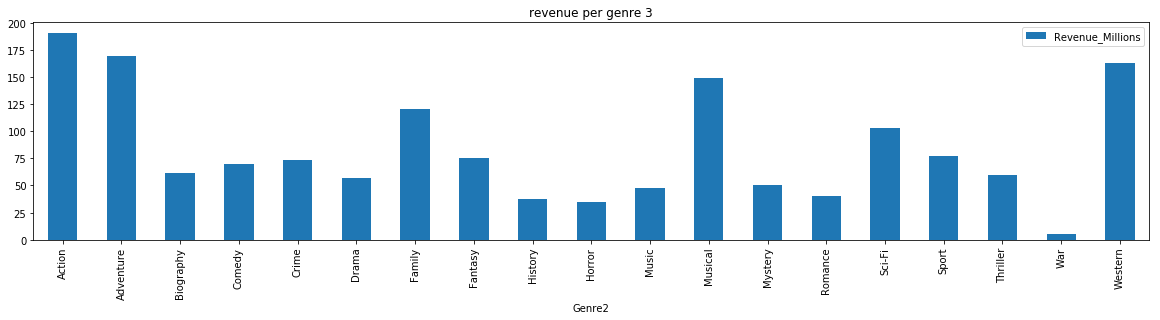

<Figure size 432x288 with 0 Axes>

In [111]:
# Use DataFrame.plot() in order to create a bar chart of the data
money_and_genre3.plot(kind="bar", figsize=(20,4))

# Set a title for the chart
plt.title("revenue per genre 3")

plt.show()
plt.tight_layout()
plt.savefig('output/RevenueVSGenre3.png')